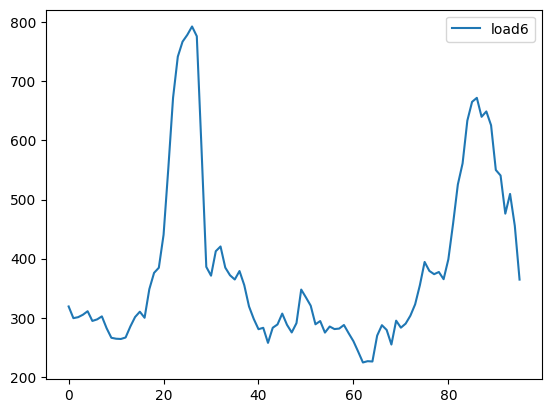

In [1]:
import sys
sys.path.insert(0,"../")
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Lambda
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 
import tensorflow as tf
import optimization_lib.full_optimisation as opt
import csv 
import matplotlib.pyplot as plt
import math
import sys
sys.path.insert(0,"../../ElectricityAndSolar/generated_data/")
import numpy as np
from keras.layers import Activation
import sys
sys.path.insert(0,"../")

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Lambda
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 
import tensorflow as tf
import optimization_lib.full_optimisation as opt
import csv 
import matplotlib.pyplot as plt
import math
import sys
sys.path.insert(0,"../../ElectricityAndSolar/generated_data/")
import numpy as np
from keras.layers import Activation

load1=[]
load2=[]
load3=[]
load4=[]
load5=[]
load6=[]
load7=[]
with open('../ElectricityAndSolar/data_houses.csv',newline='') as csvfile:
    data_read = list(csv.reader(csvfile,delimiter=',',quotechar='|'))
    #print(data[0])
    for row in data_read[1:]:
        #print(row[0])
        load1.append(eval(row[0]))
        load2.append(eval(row[1]))
        load3.append(eval(row[2]))
        load4.append(eval(row[3]))
        load5.append(eval(row[4]))
        load6.append(eval(row[5]))
        load7.append(eval(row[6]))

#plt.plot(load1,label='load1')
#plt.plot(load2,label='load2')
#plt.plot(load3,label='load3')
#plt.plot(load4,label='load4')
#plt.plot(load5,label='load5')
plt.plot(load6,label='load6')
#plt.plot(load7,label='load7')
plt.legend()
plt.show()

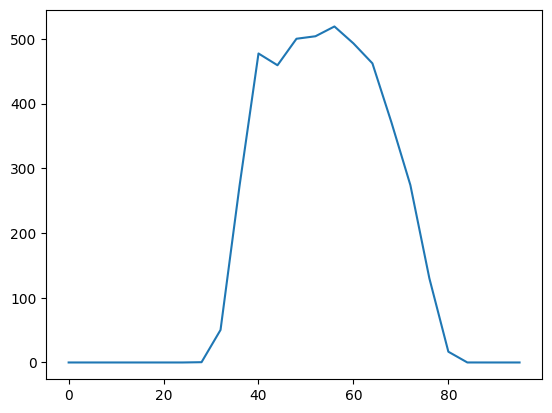

In [2]:
sys.path.insert(0,"../../ElectricityAndSolar/generated_data/")
solar1=[]
solar2=[]
solar3=[]
solar4=[]
solar5=[]
solar6=[]
solar7=[] 
with open('../ElectricityAndSolar/solar_Data.csv',newline='') as csvfile:
    data_read = list(csv.reader(csvfile,delimiter=',',quotechar='|'))
    #print(data[0])
    for row in data_read[1:]:
        #print(row[0])
        solar1.append(eval(row[0]))
        solar2.append(eval(row[1]))
        solar3.append(eval(row[2]))
        solar4.append(eval(row[3]))
        solar5.append(eval(row[4]))
        solar6.append(eval(row[5]))
        solar7.append(eval(row[6]))
#solar4 = [0]*96
#solar1= solar1[10:] + solar1[:10]
#plt.plot(solar1)
#plt.plot(solar2)
plt.plot(solar3)
#plt.plot(solar4)
#plt.plot(solar5)
#plt.plot(solar6)
#plt.plot(solar7)
#plt.plot(load4)
plt.show()

[35, 23, 5, 30, 34, 18, 15, 12, 4, 2, 14, 17, 28, 21, 6, 20, 7, 8, 25, 9, 29, 19, 26, 33, 22, 1, 32]
[0, 3, 10, 11, 13, 16, 24, 27, 31]


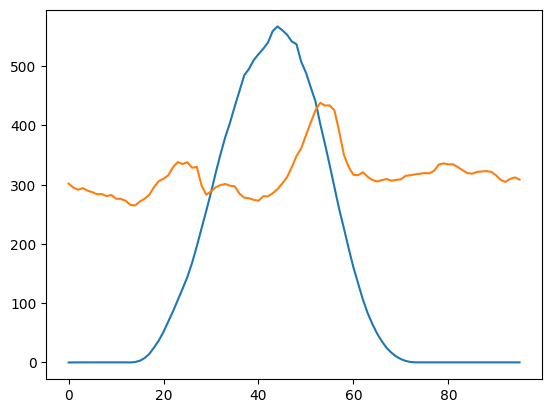

In [3]:


#create touple groups 
from collections import namedtuple
solar_load = namedtuple("solar_load","solar load")
data_list=[]

for x in [load1,load2,load3,load5,load6,load7]:
    for y in [solar2,solar3,solar4,solar5,solar6,solar7]:
        data_list.append(solar_load(y,x))

len_data = len(data_list)
train_set_len = int(0.75*len_data) 

import random
train_list  = random.sample(range(len(data_list)),train_set_len)
test_list = []

for i in range(len_data):
    if i in train_list:
        pass
    else:
        test_list.append(i)

systems = []
systems_test = []

battery_powers = [5000]
for battery_power in battery_powers:
    for i in train_list:
            
            system = opt.optimalSystemDescription(data_list[i].solar,data_list[i].load,batt_power=battery_power,batt_storage=battery_power,load_pct=40,solar_pct=40)
            system.cost = [0 for i in range(96)]
            system.enableBatteryExchangeLimit()
            systems.append(system)
            

    for i in test_list:
            system = opt.optimalSystemDescription(data_list[i].solar,data_list[i].load,batt_power=battery_power,batt_storage=battery_power,load_pct=40,solar_pct=40)
            system.cost = [0 for i in range(96)]
            system.enableBatteryExchangeLimit()
            systems_test.append(system)

plt.plot(solar1)
plt.plot(load4)
print(train_list)
print(test_list)

In [4]:
i=0
for x in systems:
    x.minimizePeak()
    x.runZeroNet()
    #batteries.append(x.optimal_results.battery_stpts)
    #batteries_real.append(x.optimal_results_real.battery_stpts)
    i=i+1
    print("optimizing ",i)

i=0
for x in systems_test:
    x.minimizePeak()
    x.runZeroNet()

    #batteries.append(x.optimal_results.battery_stpts)
    #batteries_real.append(x.optimal_results_real.battery_stpts)
    i=i+1
    print("optimizing ",i)

C:\Users\chitt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


optimizing  1
optimizing  2
optimizing  3
optimizing  4
optimizing  5
optimizing  6
optimizing  7
optimizing  8
optimizing  9
optimizing  10
optimizing  11
optimizing  12
optimizing  13
optimizing  14
optimizing  15
optimizing  16
optimizing  17
optimizing  18
optimizing  19
optimizing  20
optimizing  21
optimizing  22
optimizing  23
optimizing  24
optimizing  25
optimizing  26
optimizing  27
optimizing  1
optimizing  2
optimizing  3
optimizing  4
optimizing  5
optimizing  6
optimizing  7
optimizing  8
optimizing  9


In [5]:
data = np.random.rand(1000, 193)
data_reshaped = data.reshape((data.shape[0], data.shape[1], 1))
#print(data[0])
#print(data_reshaped[0])

In [6]:
xtrain_rnn = np.array( [[[x.solar[i],x.load[i],x.batt_power] for i in range(96)] for x in systems] )
print(xtrain_rnn.shape)
ytrain_rnn = np.array([x.optimal_results.battery_stpts for x in systems])
print(ytrain_rnn.shape)

xval_rnn = np.array( [[[x.solar[i],x.load[i],x.batt_power] for i in range(96)] for x in systems_test] )
print(xtrain_rnn)
yval_rnn = np.array([x.optimal_results.battery_stpts for x in systems_test])
print(ytrain_rnn)

(27, 96, 3)
(27, 96)
[[[   0.         828.32832   5000.       ]
  [   0.         845.9834048 5000.       ]
  [   0.         884.1043128 5000.       ]
  ...
  [   0.         625.1538891 5000.       ]
  [   0.         698.8748598 5000.       ]
  [   0.         763.5570189 5000.       ]]

 [[   0.         244.3932352 5000.       ]
  [   0.         255.2010539 5000.       ]
  [   0.         275.7794328 5000.       ]
  ...
  [   0.         423.441684  5000.       ]
  [   0.         306.8253695 5000.       ]
  [   0.         243.2010285 5000.       ]]

 [[   0.         271.6689103 5000.       ]
  [   0.         279.0833353 5000.       ]
  [   0.         271.976361  5000.       ]
  ...
  [   0.         245.5678882 5000.       ]
  [   0.         275.498789  5000.       ]
  [   0.         278.5592486 5000.       ]]

 ...

 [[   0.         244.3932352 5000.       ]
  [   0.         255.2010539 5000.       ]
  [   0.         275.7794328 5000.       ]
  ...
  [   0.         423.441684  5000.      

In [35]:
xtrain = [x.solar + x.load + [x.batt_power] for x in systems]
ytrain = [x.optimal_results.battery_stpts for x in systems]
xval = [x.solar + x.load + [x.batt_power] for x in systems_test]
yval = [x.optimal_results.battery_stpts for x in systems_test]
#print(len(xval[0]))
#print((xval[1]))
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
xval = np.array(xval)
yval = np.array(yval) 
#print(xtrain.shape)


#for x in xtrain:
#    print(len(x))
func =lambda x : x**3/(1+x**2)

model = Sequential()
model.add(keras.Input(shape=(96,3)))
#model.add(Dense(193,input_dim = 193,activation=func))

#model.add(keras.layers.SimpleRNN(193))
#model.add(Dense(192*3, activation=func))
#model.add(Dense(192*3, activation=func))
model.add(keras.layers.SimpleRNN(192,activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
#model.add(Dense(192*3, activation=func))

"""
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
#model.add(Dense(100*3, activation=func))
#model.add(Dense(96, activation=func))
#model.add(Dense(100*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
"""

model.add(Dense(96, activation="linear"))
model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=1e-3))
#model.summary()
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [36]:
history = model.fit(xtrain_rnn, ytrain_rnn, epochs=2000, batch_size=10000, verbose=1, callbacks=[])

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5379.0605
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 1400.3870
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 665.3251
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 623.2630
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 397.3315
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 335.1038
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 310.7283
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 300.8059
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 256.9160
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 242.8024
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 234.7824
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 213.2010
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 164.9480
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 175.7567
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6

In [37]:
PredTestSet = model.predict(xtrain_rnn)
#xval = [x.solar + x.load for x in systems[50:]]
i=3
#test_set = [systems[i].solar + systems[i].load]
n=1
#test_set = [systems_test[n].solar + systems_test[n].load + [5000]]
test_set = [solar1 + load4 + [5000]]
test_set_rnn = np.array([[[solar1[i],load4[i] , 5000 ] for i in range(96)]])
#test_set_rnn = np.array([[[systems_test[n].solar[i],systems_test[n].load[i] , 5000 ] for i in range(96)]])
print(test_set_rnn.shape)
print((test_set))
PredValSet = model.predict(test_set_rnn)
test_optimal_system = opt.optimalSystemDescription(test_set[0][:96],test_set[0][96:192],0,0, batt_power=5000,batt_storage=5000,soc0=40,deviate=0,deep_discharge_limit=10,days=1)
#test_optimal_system.runZeroNet()
test_optimal_system.cost = [0 for i in range(96)]
test_optimal_system.enableBatteryExchangeLimit()
test_optimal_system.minimizePeak()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
(1, 96, 3)
[[0.036647727, 0.130596591, 0.177571023, 0.201058239, 0.212801847, 0.218673651, 0.221609553, 0.223077504, 0.223811479, 0.224178467, 0.224361961, 0.224453708, 0.224499581, 0.076931818, 0.796590909, 2.937730824, 7.43818892, 14.57467685, 25.37145597, 37.23927557, 51.91309659, 69.31619318, 86.48693182, 105.4529545, 124.4004545, 144.0072727, 167.8745455, 196.15, 226.28, 256.2281818, 287.1909091, 320.6354546, 351.6272729, 380.4481822, 404.6800007, 432.3236378, 458.3981846, 484.744551, 495.6227384, 510.3454767, 520.3736808, 529.3500888, 540.0338139, 559.3839915, 567.068892, 560.8814205, 553.39375, 541.8829545, 537.0986364, 507.4818182, 489.0454545, 464.5590909, 440.7072727, 402.9045455, 368.9909091, 332.9163636, 295.7554545, 258.8436364, 226.2354545, 192.5736364, 160.5327273, 133.0809091, 106.1090909, 83.33636364, 64.76272727, 48.77454545, 35.66454545, 24.52909091, 16.52727273, 10.23454545, 5.734545455, 2.66, 0.873636364, 0.276356534, 0.226349

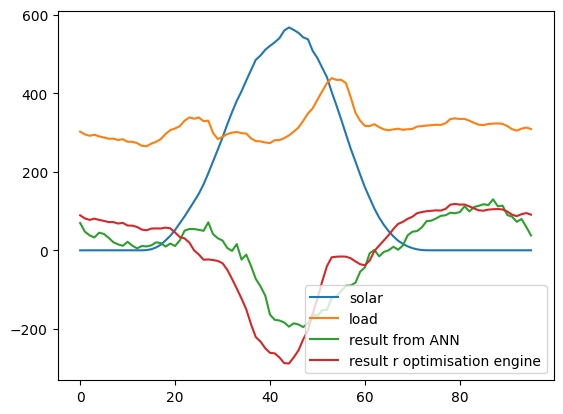

[0, 3, 10, 11, 13, 16, 24, 27, 31]
[35, 23, 5, 30, 34, 18, 15, 12, 4, 2, 14, 17, 28, 21, 6, 20, 7, 8, 25, 9, 29, 19, 26, 33, 22, 1, 32]
27
9


In [38]:
plt.plot(test_set[0][:96],label='solar')
plt.plot(test_set[0][96:192],label='load')
plt.plot(PredValSet[0],label='result from ANN')
plt.plot(test_optimal_system.optimal_results.battery_stpts,label='result r optimisation engine')
plt.legend()
plt.show()

print(test_list)
print(train_list)
print(len(systems))
print(len(systems_test))

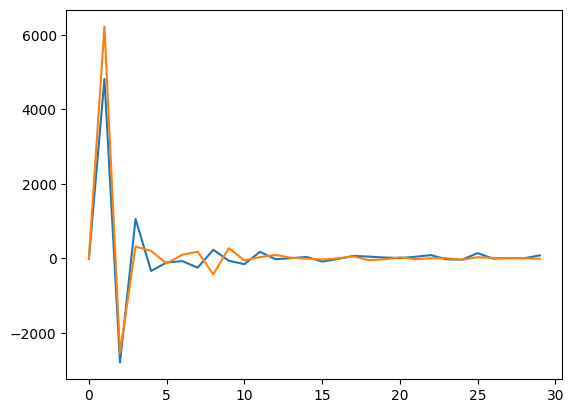

In [39]:
from scipy.fft import fft,ifft
optimal_result  = np.array(test_optimal_system.optimal_results.battery_stpts)
ann_result = np.array(PredValSet[0])
fft_opt = fft(optimal_result)
fft_ann = fft(ann_result)
plt.plot(fft_ann[:30])

plt.plot(fft_opt[:30])

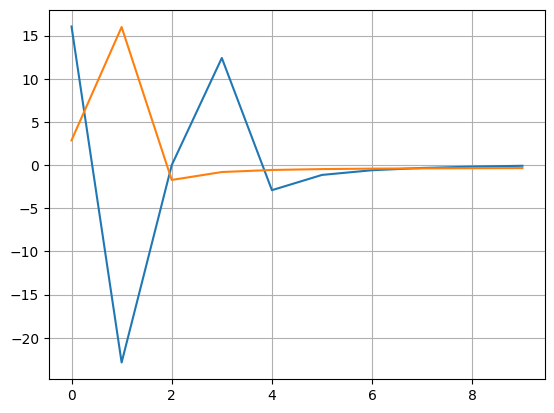

In [40]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
#x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.array([np.sin(0.05*x) + 0.5*np.sin(0.2*x) for x in range(100)])
y2 = 0.9*np.array([np.sin(0.07*x)  for x in range(100)])
yf = fft(y)
yf2 = fft(y2)
xf = fftfreq(N, T)[:N]
import matplotlib.pyplot as plt
plt.plot(yf[:10])
plt.plot(yf2[:10])
#plt.plot(xf,yf)
plt.grid()
plt.show()

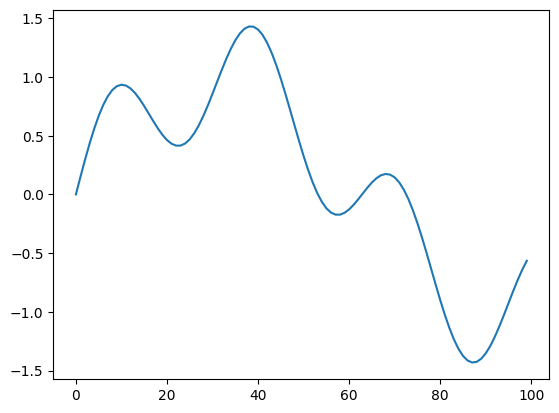

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\asyncio\selector_events.py", line 132, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 88, in _run
    self._con

In [ ]:
plt.plot(y)